In [43]:
import argparse
import logging
import time
import ast
import matplotlib.pyplot as plt

from tf_pose import common
import cv2
import os
import math
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

from tf_pose.lifting.prob_model import Prob3dPose
from tf_pose.lifting.draw import plot_pose

In [2]:
#Dataset
import scipy.io
dataset = scipy.io.loadmat('joints.mat')

In [35]:
#Cargar imagenes
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_COLOR)
        if img is not None:
            images.append(img)
    return images
folder="./dataset_images"

images = load_images_from_folder(folder)

In [44]:
#Distancia euclidana
def calcDistance(x1,y1,x2,y2):
    a = (x2-x1)**2
    b = (y2-y1)**2
    c = math.sqrt(a+b)
    return c

    

In [50]:
#modelo
e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(432, 368))
#vars
w = 0
h = 0
cont = 0
totalElapsed = 0
totalDist = 0
it = 0

#body parts
#Neck Openpose 1  MPII 12
#Rshoulder 2           8
#Lshoulder 5           9  
#lHip      11          3       
#Rhip      8           2     
#lknee     12          4               
#rknee     9           1         
#lankle    13          5                  
#rankle    10          0           
#lwrist    7           11                
#rwrist    4           6                    


#inferencia
for image in images:
    t = time.time()
    humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    it+=1
    elapsed = time.time() - t
    if humans:
        #time
        cont+=1
        totalElapsed+=elapsed
        #mean distances
        #1 openpose
        x1 = humans[0].body_parts[1].x*image.shape[1]
        y1 = humans[0].body_parts[1].y*image.shape[0]
        #2 MPII
        x2 = dataset['joints'][0][12][it]
        y2 = dataset['joints'][1][12][it]
        newDistance = calcDistance(x1,y1,x2,y2)
        totalDist+=newDistance
totalElapsed = totalElapsed/cont
totalDist = totalDist/cont
print('mean time inference: %.4f seconds.' % (totalElapsed))

[2020-10-27 15:50:18,781] [TfPoseEstimator] [INFO] loading graph from C:\Users\Diego\Desktop\tf-pose-estimation\models\graph/mobilenet_thin/graph_opt.pb(default size=432x368)
2020-10-27 15:50:18,781 INFO loading graph from C:\Users\Diego\Desktop\tf-pose-estimation\models\graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

TfPoseEstimator_1/Openpose/MConv_Stage4_L2_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_1_pointwise/Relu
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_2_depthwise/depthwise_weights
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_2_pointwise/weights
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_2_depthwise/depthwise
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_2_pointwise/Conv2D
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_2_pointwise/Conv2D_bn_offset
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_2_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_2_pointwise/Relu
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_3_depthwise/depthwise_weights
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_3_pointwise/weights
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_3_depthwise/depthwise
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_3_pointwise/Conv2D
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_3_pointwise/Conv2D_bn_offset
TfPoseEstimator_1/Openpose/MConv_Stage4_L2_3_point

report_uninitialized_variables_5/boolean_mask/strided_slice_1
report_uninitialized_variables_5/boolean_mask/Shape_2
report_uninitialized_variables_5/boolean_mask/strided_slice_2/stack
report_uninitialized_variables_5/boolean_mask/strided_slice_2/stack_1
report_uninitialized_variables_5/boolean_mask/strided_slice_2/stack_2
report_uninitialized_variables_5/boolean_mask/strided_slice_2
report_uninitialized_variables_5/boolean_mask/concat/values_1
report_uninitialized_variables_5/boolean_mask/concat/axis
report_uninitialized_variables_5/boolean_mask/concat
report_uninitialized_variables_5/boolean_mask/Reshape
report_uninitialized_variables_5/boolean_mask/Reshape_1/shape
report_uninitialized_variables_5/boolean_mask/Reshape_1
report_uninitialized_variables_5/boolean_mask/Where
report_uninitialized_variables_5/boolean_mask/Squeeze
report_uninitialized_variables_5/boolean_mask/GatherV2/axis
report_uninitialized_variables_5/boolean_mask/GatherV2
init_2
TfPoseEstimator_3/MobilenetV1/Conv2d_0/we

TfPoseEstimator_4/Openpose/MConv_Stage3_L2_3_pointwise/weights
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_3_depthwise/depthwise
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_3_pointwise/Conv2D
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_3_pointwise/Conv2D_bn_offset
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_3_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_3_pointwise/Relu
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_4_depthwise/depthwise_weights
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_4_pointwise/weights
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_4_depthwise/depthwise
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_4_pointwise/Conv2D
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_4_pointwise/Conv2D_bn_offset
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_4_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_4_pointwise/Relu
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_5_depthwise/depthwise_weights
TfPoseEstimator_4/Openpose/MConv_Stage3_L2_5_point

report_uninitialized_variables_15/stack
report_uninitialized_variables_15/LogicalNot
report_uninitialized_variables_15/Const
report_uninitialized_variables_15/boolean_mask/Shape
report_uninitialized_variables_15/boolean_mask/strided_slice/stack
report_uninitialized_variables_15/boolean_mask/strided_slice/stack_1
report_uninitialized_variables_15/boolean_mask/strided_slice/stack_2
report_uninitialized_variables_15/boolean_mask/strided_slice
report_uninitialized_variables_15/boolean_mask/Prod/reduction_indices
report_uninitialized_variables_15/boolean_mask/Prod
report_uninitialized_variables_15/boolean_mask/Shape_1
report_uninitialized_variables_15/boolean_mask/strided_slice_1/stack
report_uninitialized_variables_15/boolean_mask/strided_slice_1/stack_1
report_uninitialized_variables_15/boolean_mask/strided_slice_1/stack_2
report_uninitialized_variables_15/boolean_mask/strided_slice_1
report_uninitialized_variables_15/boolean_mask/Shape_2
report_uninitialized_variables_15/boolean_mask/str

report_uninitialized_variables_24/IsVariableInitialized
report_uninitialized_variables_24/IsVariableInitialized_1
report_uninitialized_variables_24/IsVariableInitialized_2
report_uninitialized_variables_24/IsVariableInitialized_3
report_uninitialized_variables_24/IsVariableInitialized_4
report_uninitialized_variables_24/IsVariableInitialized_5
report_uninitialized_variables_24/IsVariableInitialized_6
report_uninitialized_variables_24/stack
report_uninitialized_variables_24/LogicalNot
report_uninitialized_variables_24/Const
report_uninitialized_variables_24/boolean_mask/Shape
report_uninitialized_variables_24/boolean_mask/strided_slice/stack
report_uninitialized_variables_24/boolean_mask/strided_slice/stack_1
report_uninitialized_variables_24/boolean_mask/strided_slice/stack_2
report_uninitialized_variables_24/boolean_mask/strided_slice
report_uninitialized_variables_24/boolean_mask/Prod/reduction_indices
report_uninitialized_variables_24/boolean_mask/Prod
report_uninitialized_variables

KeyError: 1

In [4]:
humans

[BodyPart:0-(0.57, 0.16) score=0.60 BodyPart:1-(0.54, 0.25) score=0.63 BodyPart:2-(0.37, 0.25) score=0.66 BodyPart:3-(0.26, 0.38) score=0.43 BodyPart:4-(0.29, 0.35) score=0.27 BodyPart:5-(0.69, 0.26) score=0.48 BodyPart:6-(0.71, 0.36) score=0.42 BodyPart:7-(0.71, 0.41) score=0.31 BodyPart:8-(0.43, 0.50) score=0.63 BodyPart:9-(0.46, 0.71) score=0.76 BodyPart:10-(0.46, 0.88) score=0.60 BodyPart:11-(0.63, 0.50) score=0.70 BodyPart:12-(0.60, 0.71) score=0.74 BodyPart:13-(0.51, 0.89) score=0.42 BodyPart:14-(0.54, 0.15) score=0.48 BodyPart:15-(0.60, 0.15) score=0.54 BodyPart:16-(0.49, 0.16) score=0.54 BodyPart:17-(0.63, 0.16) score=0.33]

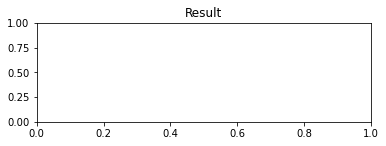

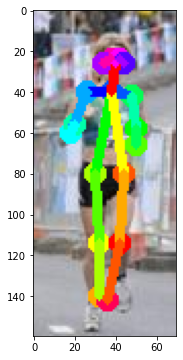

In [7]:
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
fig = plt.figure()
plt.figure(figsize=(10,6))
a = fig.add_subplot(2, 1, 1)
a.set_title('Result')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [20]:
print(humans[0].body_parts[10].x*image.shape[1])
print(humans[0].body_parts[10].y*image.shape[0])
print(image.shape[1])

32.0
140.0
70


In [26]:
print(dataset['joints'][0][0][0])
print(dataset['joints'][1][0][0])



29.74645940655481
143.34544031478885


In [42]:
dataset['joints'][0][14]

IndexError: index 14 is out of bounds for axis 0 with size 14

In [63]:
humans = e.inference(images[0], resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
humans

[BodyPart:0-(0.57, 0.16) score=0.60 BodyPart:1-(0.54, 0.25) score=0.63 BodyPart:2-(0.37, 0.25) score=0.66 BodyPart:3-(0.26, 0.38) score=0.43 BodyPart:4-(0.29, 0.35) score=0.27 BodyPart:5-(0.69, 0.26) score=0.48 BodyPart:6-(0.71, 0.36) score=0.42 BodyPart:7-(0.71, 0.41) score=0.31 BodyPart:8-(0.43, 0.50) score=0.63 BodyPart:9-(0.46, 0.71) score=0.76 BodyPart:10-(0.46, 0.88) score=0.60 BodyPart:11-(0.63, 0.50) score=0.70 BodyPart:12-(0.60, 0.71) score=0.74 BodyPart:13-(0.51, 0.89) score=0.42 BodyPart:14-(0.54, 0.15) score=0.48 BodyPart:15-(0.60, 0.15) score=0.54 BodyPart:16-(0.49, 0.16) score=0.54 BodyPart:17-(0.63, 0.16) score=0.33]

In [64]:
pose_2d_mpii, visibility = common.MPIIPart.from_coco(humans[0])

In [65]:
pose_2d_mpii

[(0.5714285714285714, 0.1625),
 (0.5428571428571428, 0.25),
 (0.37142857142857144, 0.25),
 (0.2571428571428571, 0.375),
 (0.2857142857142857, 0.35),
 (0.6857142857142857, 0.2625),
 (0.7142857142857143, 0.3625),
 (0.7142857142857143, 0.4125),
 (0.42857142857142855, 0.5),
 (0.45714285714285713, 0.7125),
 (0.45714285714285713, 0.875),
 (0.6285714285714286, 0.5),
 (0.6, 0.7125),
 (0.5142857142857142, 0.8875)]

In [67]:
print(dataset['joints'][1][0][0])

143.34544031478885
